In [11]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

from sklearn.tree import export_graphviz
import pydotplus
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image


In [12]:
df_no_outliers = pd.read_csv('new_df_without_outliers_copy_smote_resampled_noNormalised.csv')
df_outliers = pd.read_csv('new_df_outliers_only_copy_smote_resampled_noNormalised.csv')

In [13]:
df_no_outliers['bmi'] = df_no_outliers['bmi'].round().astype(int)
df_no_outliers['age'] = df_no_outliers['age'].round().astype(int)

df_no_outliers

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,80,0,1,25,6.600000,140,0.131757,-0.128959,0
1,54,0,0,27,6.600000,80,-0.797024,-0.128959,0
2,28,0,0,27,5.700000,158,0.131757,0.160772,0
3,36,0,0,23,5.000000,155,0.165669,-0.128959,0
4,76,1,1,20,4.800000,155,0.165669,0.160772,0
...,...,...,...,...,...,...,...,...,...
181139,80,0,0,27,6.949298,126,0.554826,0.160772,1
181140,80,0,0,27,5.800000,155,0.313504,-0.052799,1
181141,35,0,0,27,6.995535,159,0.383605,0.160772,1
181142,58,0,0,27,6.017092,155,-0.797024,0.160772,1


In [14]:
df_outliers['bmi'] = df_outliers['bmi'].round().astype(int)
df_outliers['age'] = df_outliers['age'].round().astype(int)
df_outliers

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,54,0,0,55,6.000000,100,0.310171,-0.310005,0
1,34,0,0,56,6.200000,200,-0.052540,-0.310005,0
2,67,0,0,63,8.800000,155,-0.052540,-0.310005,1
3,38,0,0,56,6.500000,130,-0.052540,0.561670,0
4,30,0,0,50,6.000000,100,-0.273853,-0.310005,0
...,...,...,...,...,...,...,...,...,...
6163,59,0,0,48,5.914183,158,-0.052540,-0.310005,0
6164,36,0,0,48,4.800000,127,-0.182851,-0.310005,0
6165,16,0,0,51,6.213743,82,-0.179245,-0.310005,0
6166,40,0,0,51,6.401829,155,-0.200757,-0.022104,0


In [15]:
X_no_outliers = df_no_outliers.drop('diabetes', axis=1)
y_no_outliers = df_no_outliers['diabetes']

X_outliers = df_outliers.drop('diabetes', axis=1)
y_outliers = df_outliers['diabetes']

In [16]:
X_outliers

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded
0,54,0,0,55,6.000000,100,0.310171,-0.310005
1,34,0,0,56,6.200000,200,-0.052540,-0.310005
2,67,0,0,63,8.800000,155,-0.052540,-0.310005
3,38,0,0,56,6.500000,130,-0.052540,0.561670
4,30,0,0,50,6.000000,100,-0.273853,-0.310005
...,...,...,...,...,...,...,...,...
6163,59,0,0,48,5.914183,158,-0.052540,-0.310005
6164,36,0,0,48,4.800000,127,-0.182851,-0.310005
6165,16,0,0,51,6.213743,82,-0.179245,-0.310005
6166,40,0,0,51,6.401829,155,-0.200757,-0.022104


In [17]:
y_no_outliers

0         0
1         0
2         0
3         0
4         0
         ..
181139    1
181140    1
181141    1
181142    1
181143    1
Name: diabetes, Length: 181144, dtype: int64

# Decision Tree without outliers

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=424)

In [46]:
# initialise Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=424)

# train model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=424)

[Text(0.5416666666666666, 0.9, 'HbA1c_level <= 5.7\nentropy = 1.0\nsamples = 144915\nvalue = [72467, 72448]'),
 Text(0.25, 0.7, 'HbA1c_level <= 5.35\nentropy = 0.235\nsamples = 37577\nvalue = [36130, 1447]'),
 Text(0.16666666666666666, 0.5, 'entropy = 0.0\nsamples = 30007\nvalue = [30007, 0]'),
 Text(0.3333333333333333, 0.5, 'age <= 55.5\nentropy = 0.704\nsamples = 7570\nvalue = [6123, 1447]'),
 Text(0.16666666666666666, 0.3, 'blood_glucose_level <= 210.0\nentropy = 0.363\nsamples = 4788\nvalue = [4457, 331]'),
 Text(0.08333333333333333, 0.1, 'entropy = 0.294\nsamples = 4700\nvalue = [4457, 243]'),
 Text(0.25, 0.1, 'entropy = 0.0\nsamples = 88\nvalue = [0, 88]'),
 Text(0.5, 0.3, 'blood_glucose_level <= 113.0\nentropy = 0.972\nsamples = 2782\nvalue = [1666, 1116]'),
 Text(0.4166666666666667, 0.1, 'entropy = 0.0\nsamples = 488\nvalue = [488, 0]'),
 Text(0.5833333333333334, 0.1, 'entropy = 0.999\nsamples = 2294\nvalue = [1178, 1116]'),
 Text(0.8333333333333334, 0.7, 'HbA1c_level <= 6.6\ne

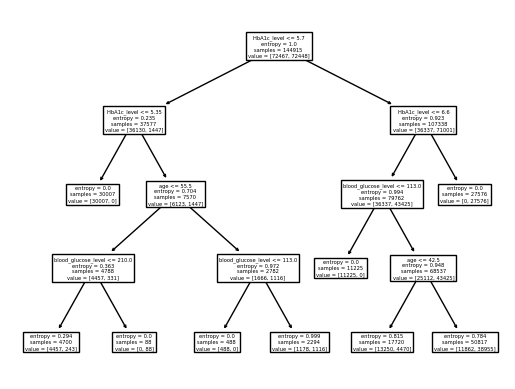

In [47]:
plot_tree(dtree.fit(X_train, y_train),feature_names=X_no_outliers.columns.tolist())

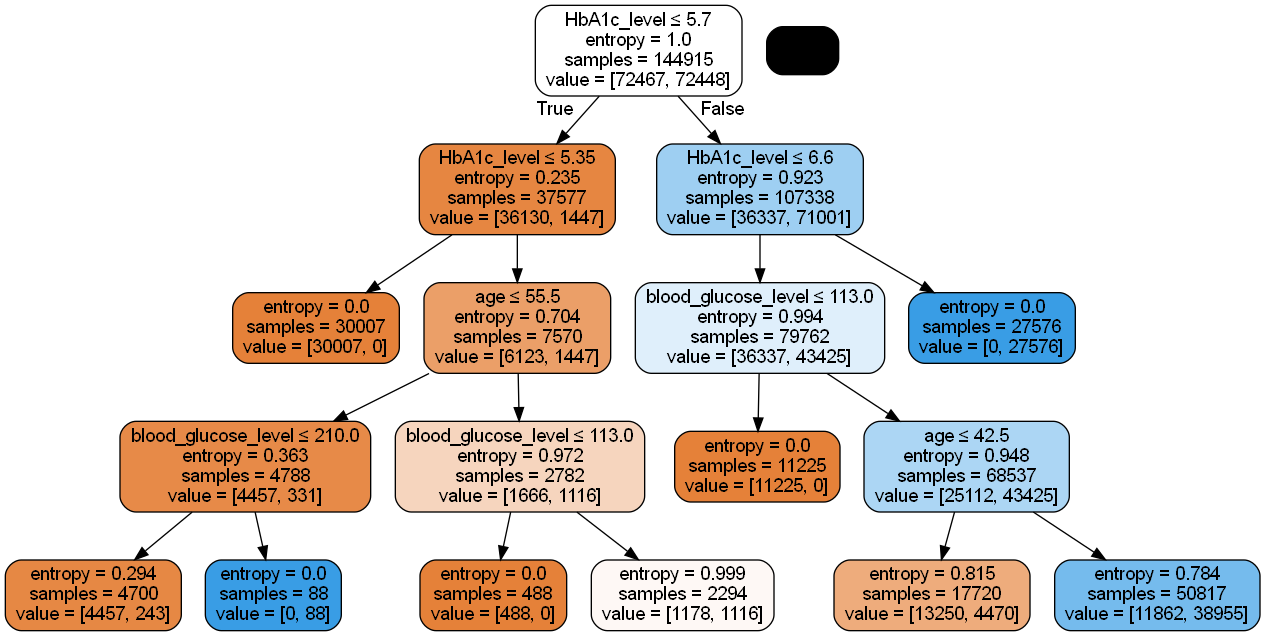

In [48]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, 
                      feature_names = X_no_outliers.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

If an individual's HbA1c level is less than or equal to 5.35 -> low risk for diabetes.
High blood glucose levels typically lead to a higher predicted risk of diabetes.
Age can be a factor if HbA1c and blood glucose levels are borderline, being younger than 42.5 might have risk of diabetes

In [49]:
# get predictions 
predictions = dtree.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) \
    .sample(10)

,Actual,Predicted
43873,0,0
152764,1,1
113512,1,1
181111,1,1
77284,0,0
17793,0,0
17780,1,1
123566,1,1
130448,1,1
75155,0,0


In [50]:
conf_matrix = confusion_matrix(predictions,y_test)
conf_matrix

array([[15150,  1441],
       [ 2955, 16683]], dtype=int64)

In [51]:
# Performance Evaluation 
print('Accuracy:',accuracy_score(y_test, predictions))

print('\nPrecision:',precision_score(y_test, predictions))

print('\nRecall:',recall_score(y_test, predictions))

print('\nF1 score:',f1_score(y_test, predictions))


Accuracy: 0.878660741395015

Precision: 0.8495264283531928

Recall: 0.9204921650849702

F1 score: 0.8835866744346168


<h3>Hyperparameter Tuning</h3>

In [55]:
# It suddenly took very long to run the grid search, so KIV for now.
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy'] 
}

decision_tree_model = DecisionTreeClassifier(random_state=424)

grid_search = GridSearchCV(decision_tree_model, params, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)
f1_score = best_model.score(X_test, y_test)
#print('Best Parameters:',best_model.best_params_,end='\n\n')
print('f1_score:', f1_score)

KeyboardInterrupt: 

# Decision Tree with outliers

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_outliers, y_outliers, test_size=0.2, random_state=424)

In [33]:
# initialise Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=424)

# train model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=424)

[Text(0.5, 0.9, 'bmi <= 46.5\nentropy = 1.0\nsamples = 4934\nvalue = [2427, 2507]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 2122\nvalue = [0, 2122]'),
 Text(0.6666666666666666, 0.7, 'HbA1c_level <= 6.7\nentropy = 0.576\nsamples = 2812\nvalue = [2427, 385]'),
 Text(0.5, 0.5, 'blood_glucose_level <= 210.0\nentropy = 0.376\nsamples = 2617\nvalue = [2427, 190]'),
 Text(0.3333333333333333, 0.3, 'HbA1c_level <= 5.699\nentropy = 0.246\nsamples = 2530\nvalue = [2427, 103]'),
 Text(0.16666666666666666, 0.1, 'entropy = 0.0\nsamples = 1184\nvalue = [1184, 0]'),
 Text(0.5, 0.1, 'entropy = 0.39\nsamples = 1346\nvalue = [1243, 103]'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.0\nsamples = 87\nvalue = [0, 87]'),
 Text(0.8333333333333334, 0.5, 'entropy = 0.0\nsamples = 195\nvalue = [0, 195]')]

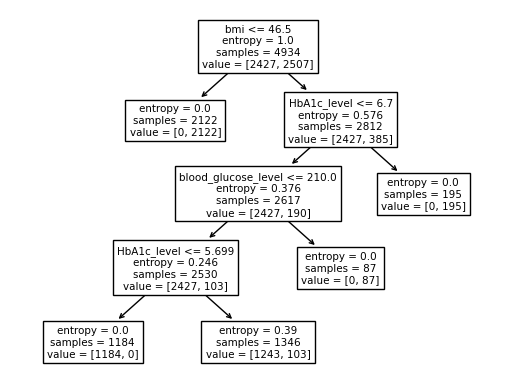

In [35]:
plot_tree(dtree.fit(X_train, y_train),feature_names=X_outliers.columns.tolist())

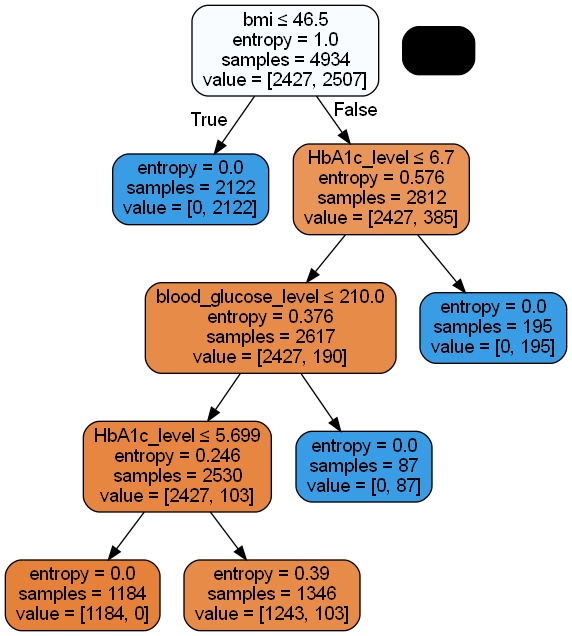

In [36]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, 
                      feature_names = X_outliers.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Individuals with bmi less than 46.5 are diabetic...

In [37]:
# get predictions 
predictions = dtree.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) \
    .sample(10)

,Actual,Predicted
956,0,0
1607,1,1
5249,0,0
3820,1,1
4415,0,0
396,0,0
3469,1,1
5795,0,0
5615,0,0
1889,1,1


In [38]:
conf_matrix = confusion_matrix(predictions,y_test)
conf_matrix

array([[657,  31],
       [  0, 546]], dtype=int64)

In [40]:
# Performance Evaluation 
print('Accuracy:',accuracy_score(y_test, predictions))

print('\nPrecision:',precision_score(y_test, predictions))

print('\nRecall:',recall_score(y_test, predictions))

print('\nF1 score:',f1_score(y_test, predictions))
dtree.score(X_test, y_test)

Accuracy: 0.9748784440842788

Precision: 1.0

Recall: 0.9462738301559792

F1 score: 0.9723953695458593


0.9748784440842788

<h3>Hyperparameter Tuning</h3>

In [ ]:
# It suddenly took very long to run the grid search, so KIV for now.
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy'] 
}

decision_tree_model = DecisionTreeClassifier(random_state=424)

grid_search = GridSearchCV(decision_tree_model, params, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)
f1_score = best_model.score(X_test, y_test)
#print('Best Parameters:',best_model.best_params_,end='\n\n')
print('f1_score:', f1_score)